In [ ]:
# import package
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from pickle import dump
from pickle import load

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the datasets
train = pd.read_csv('/content/sample_data/NB.csv')
train['Fault'] = 0

test = pd.read_csv('/content/sample_data/IR - 7.csv')
test['Fault'] = 1

# Concatenate train and test data
dataset = pd.concat([train, test], ignore_index=True)
#dataset
dataset.tail(2000)


,DE,FE,Fault
240310,-0.637395,0.201345,1
240311,1.007260,0.757716,1
240312,0.947647,0.479736,1
240313,-0.991179,0.251682,1
240314,-0.571122,0.211618,1
...,...,...,...
242305,0.135958,-0.047255,1
242306,-0.083167,-0.070882,1
242307,0.391469,-0.181005,1
242308,0.185501,0.136011,1


## describing data

### Basic statistics

In [ ]:
dataset.describe()

,DE,FE,Fault
count,242310.000000,242310.000000,242310.000000
mean,0.008163,0.033348,0.500000
std,0.216483,0.170863,0.500001
min,-1.425531,-0.895782,0.000000
25%,-0.065505,-0.041913,0.000000
50%,0.011474,0.031435,0.500000
75%,0.080317,0.107658,1.000000
max,1.639620,0.957213,1.000000


### EDA

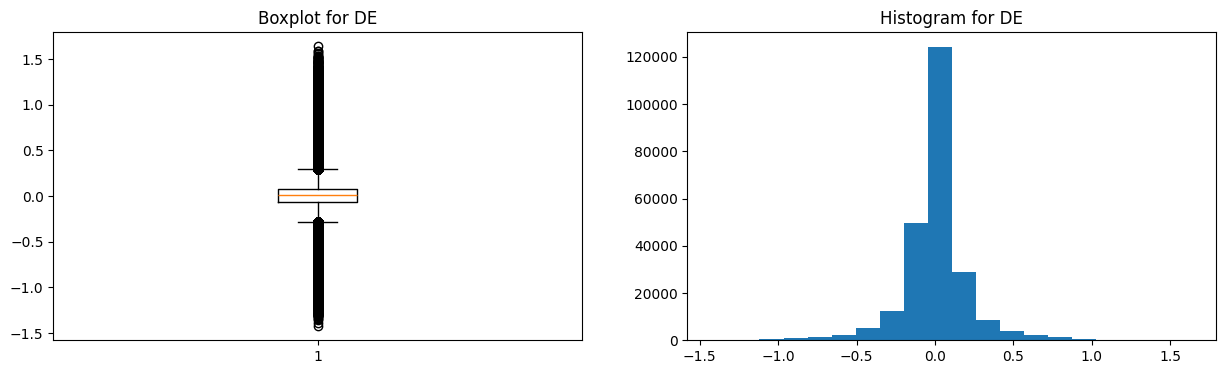

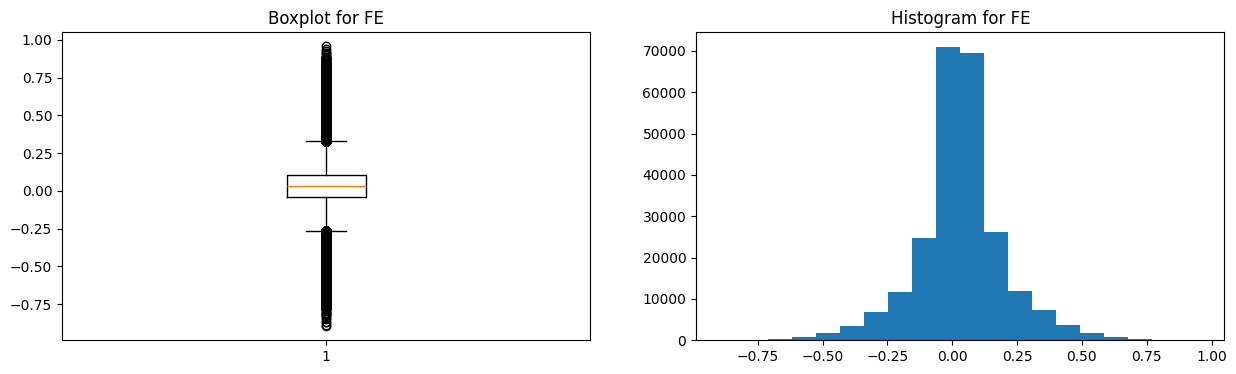

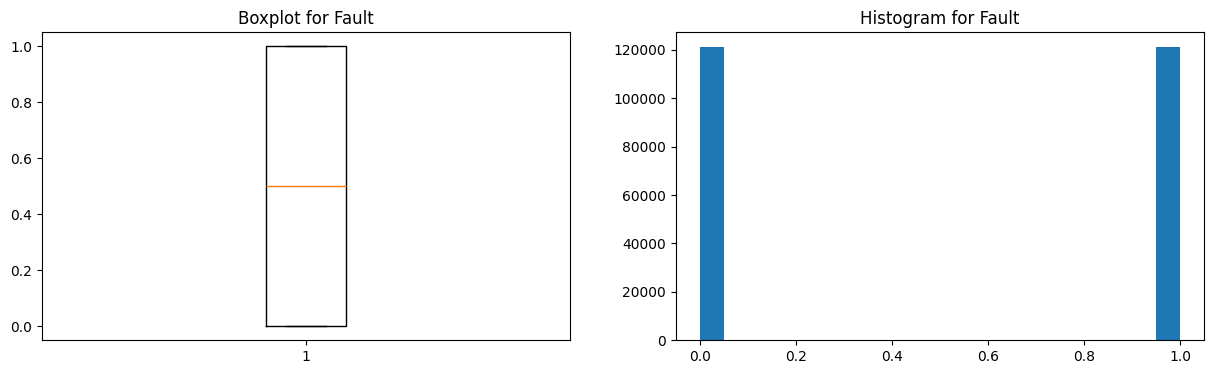

In [ ]:
# Boxpot and histogram of each feature
for (columnName, columnData) in dataset.items():
    # Creating an empty chart
    fig, ((ax1, ax2)) = plt.subplots(1, 2,  figsize=(15, 4))

    # Extracting the feature values
    x = columnData

    # Boxplot
    ax1.boxplot(x)
    ax1.set_title( 'Boxplot for {}'.format(columnName) )

    # Histogram
    ax2.hist(x, bins=20)
    ax2.set_title( 'Histogram for {}'.format(columnName) )

    # Display
    plt.show()

### Null and duplicated value check

In [ ]:
# Checking for null values
features = ['DE', 'FE', 'Fault']
N_null = sum(dataset[features].isnull().sum())
print("The dataset contains {} null values".format(N_null)) #0 null values

# Removing duplicates if there exist
N_dupli = sum(dataset.duplicated(keep='first'))
dataset = dataset.drop_duplicates(keep='first').reset_index(drop=True)
print("The dataset contains {} duplicates".format(N_dupli))

# Number of samples in the dataset
N = dataset.shape[0]

The dataset contains 0 null values
The dataset contains 6941 duplicates


6941 duplicated values are dropped

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235369 entries, 0 to 235368
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DE      235369 non-null  float64
 1   FE      235369 non-null  float64
 2   Fault   235369 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 5.4 MB


## Data preparation

### Feature engineering

### Split data

In [ ]:
#split the data into independent 'X' and dependent 'Y' variables
X = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, 2]

In [ ]:
#split the data set into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) #random se hamesha same spliting aaYegi

In [ ]:
import os
from pickle import dump

# Directory path
directory = "pickle/dataset/bearing-failure-prediction/"

# Create the directory if it doesn't exist
os.makedirs(directory, exist_ok=True)

# Dump the datasets
dump(X_train, open(os.path.join(directory, "X_train.pkl"), "wb"))
dump(y_train, open(os.path.join(directory, "y_train.pkl"), "wb"))
dump(X_test, open(os.path.join(directory, "X_test.pkl"), "wb"))
dump(y_test, open(os.path.join(directory, "y_test.pkl"), "wb"))


scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
sc = StandardScaler()

# Fit the scaler on the training data and transform
X_train_sc = sc.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_sc = sc.transform(X_test)


save scaled data

In [ ]:
# Directory path
directory = "pickle/dataset/bearing-failure-prediction/"

# Create the directory if it doesn't exist
os.makedirs(directory, exist_ok=True)

# Dump the scaled datasets
dump(X_train_sc, open(os.path.join(directory, "X_train_sc.pkl"), "wb"))
dump(X_test_sc, open(os.path.join(directory, "X_test_sc.pkl"), "wb"))

In [ ]:
def train_models(X_train, y_train):
    # Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, y_train)

    # K-Neighbors Classifier
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    knn.fit(X_train, y_train)

    # Gaussian Naive Bayes
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)

    # Decision Tree Classifier
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    tree.fit(X_train, y_train)

    # Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    forest.fit(X_train, y_train)

    # Print the training accuracy of each model
    print('[0] Logistic Regression Training Accuracy:', log.score(X_train, y_train))
    print('[1] KNeighbors Training Accuracy:', knn.score(X_train, y_train))
    print('[2] GaussianNB Training Accuracy:', gauss.score(X_train, y_train))
    print('[3] Decision Tree Training Accuracy:', tree.score(X_train, y_train))
    print('[4] RandomForest Training Accuracy:', forest.score(X_train, y_train))

    return log, knn, gauss, tree, forest


with standard scaled data


In [ ]:
# load data
X_train_sc = load(open('pickle/dataset/bearing-failure-prediction/X_train_sc.pkl', 'rb'))
X_test_sc = load(open('pickle/dataset/bearing-failure-prediction/X_test_sc.pkl', 'rb'))
y_train = load(open('pickle/dataset/bearing-failure-prediction/y_train.pkl', 'rb'))
y_test = load(open('pickle/dataset/bearing-failure-prediction/y_test.pkl', 'rb'))

In [ ]:
models_sc = train_models(X_train_sc, y_train)

[0] Logistic Regression Training Accuracy: 0.4672349239225683
[1] KNeighbors Training Accuracy: 0.8840171008258318
[2] GaussianNB Training Accuracy: 0.8606335802862529
[3] Decision Tree Training Accuracy: 0.9999787567380971
[4] RandomForest Training Accuracy: 0.9836479991502696


In [ ]:
import os

# Ensure the directory exists before saving the models
os.makedirs('pickle/models/bearing_classifiers/standard_scaled/', exist_ok=True)

# Loop through the models and save each to a file
for i in range(len(models_sc)):
    # Save model to file
    fileName = 'pickle/models/bearing_classifiers/standard_scaled/' + str(models_sc[i].__class__.__name__) + '.pkl'
    dump(models_sc[i], open(fileName, 'wb'))


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

def print_scores(y, y_pred, model):
    try:
        # Calculate the metrics with zero_division handling
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred, pos_label=1, zero_division=0)
        recall = recall_score(y, y_pred, pos_label=1, zero_division=0)
        f1 = f1_score(y, y_pred, pos_label=1, zero_division=0)

        # Print all the metrics
        print(f"{model} Performance Metrics:")
        print(f"  Accuracy: {accuracy:.02%}")
        print(f"  Precision: {precision:.02%}")
        print(f"  Recall: {recall:.02%}")
        print(f"  F1 Score: {f1:.02%}")
    except Exception as e:
        print(f"Error calculating metrics for {model}: {e}")


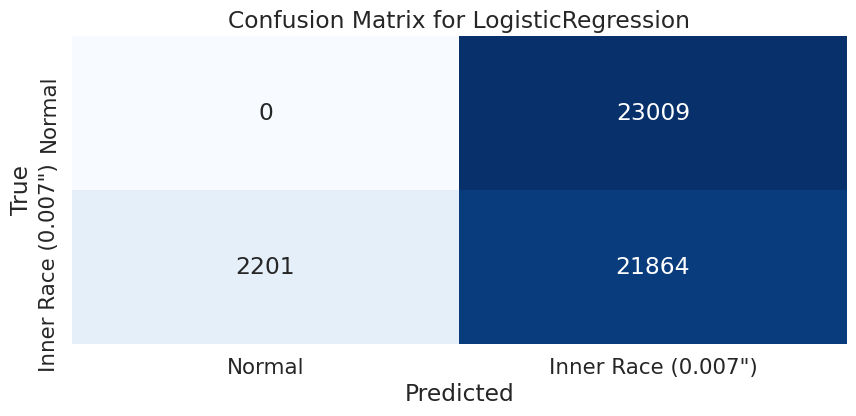

LogisticRegression(random_state=0) Performance Metrics:
  Accuracy: 46.45%
  Precision: 48.72%
  Recall: 90.85%
  F1 Score: 63.43%


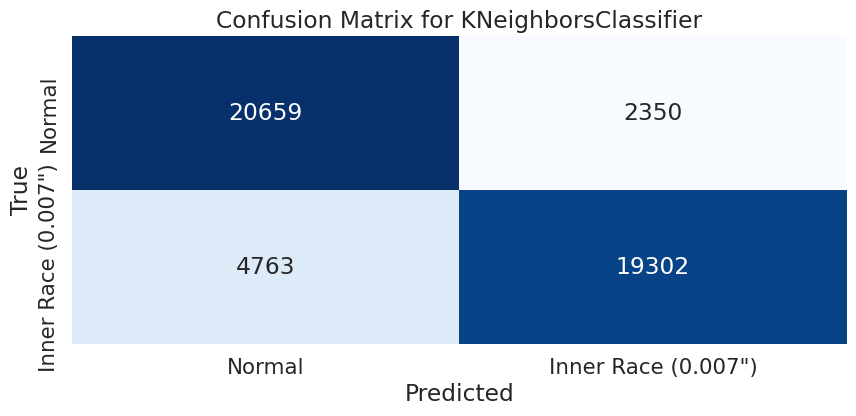

KNeighborsClassifier() Performance Metrics:
  Accuracy: 84.89%
  Precision: 89.15%
  Recall: 80.21%
  F1 Score: 84.44%


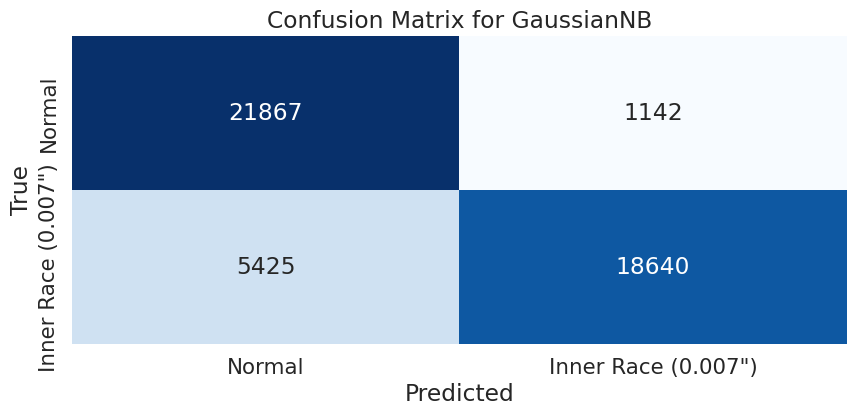

GaussianNB() Performance Metrics:
  Accuracy: 86.05%
  Precision: 94.23%
  Recall: 77.46%
  F1 Score: 85.02%


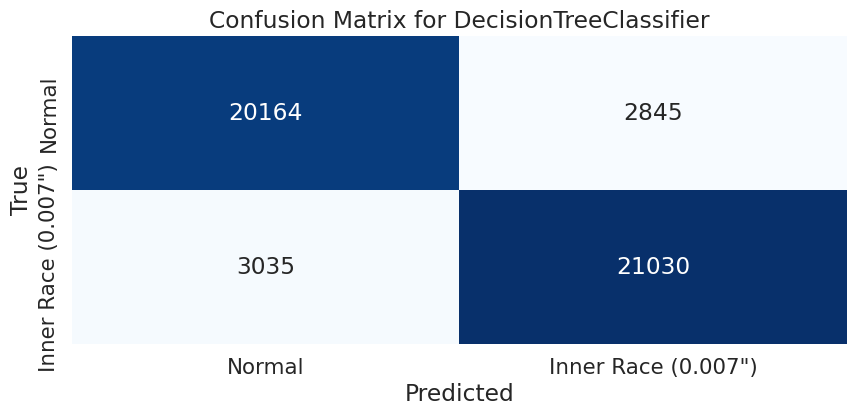

DecisionTreeClassifier(criterion='entropy', random_state=0) Performance Metrics:
  Accuracy: 87.51%
  Precision: 88.08%
  Recall: 87.39%
  F1 Score: 87.73%


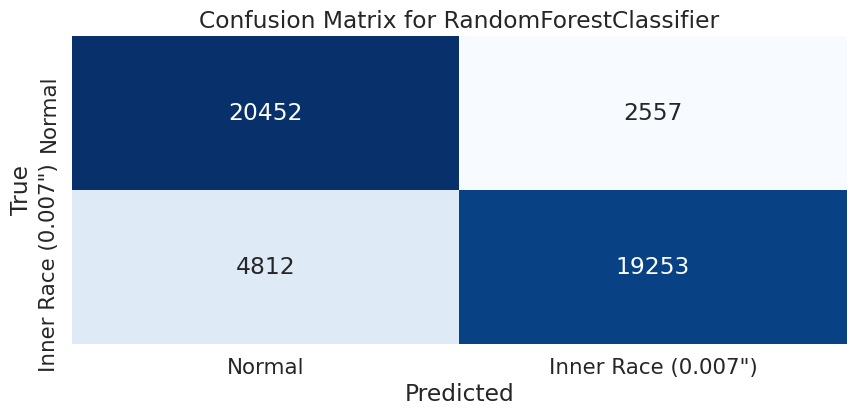

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0) Performance Metrics:
  Accuracy: 84.35%
  Precision: 88.28%
  Recall: 80.00%
  F1 Score: 83.94%


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming print_scores function is already defined

for i in range(len(models_sc)):
    # Predict using the model
    y_pred = models_sc[i].predict(X_test_sc) #(entered by user)

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Define index and columns for the confusion matrix
    index = ['Normal', 'Inner Race (0.007")']
    columns = ['Normal', 'Inner Race (0.007")']

    # Convert confusion matrix to DataFrame for better visualization
    cm_df = pd.DataFrame(cm, columns=columns, index=index)

    # Plotting confusion matrix as a heatmap
    plt.figure(figsize=(10, 4))
    sns.set(font_scale=1.4)  # For label size
    sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False)  # Heatmap with annotations
    plt.title(f'Confusion Matrix for {models_sc[i].__class__.__name__}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Print the scores of the model
    print_scores(y_test, y_pred, models_sc[i])
